# Stage 1: Data Aquisition and Insight Creation.

### Role of libraries imported:

**numpy** - is used to apply mathematical functions and operations to our multi-dimensional arrays.  
**matplotlib** - used for Visualization purposes such as ploting graphs for various datapoints.  
**pandas** - is basically a data analysis and manipulation tool.  
**datetime** - to work with date as date objects.  

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

The historical stock data is collected from the Google Stock Price and this historical data is used for the prediction of future stock prices.\
'read_csv()' is an important pandas function to read csv files and do operations on it.

In [2]:
# Reading training dataset.
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


In [3]:
# Printing top 5 rows of dataset.
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


**There are six columns in this dataset. These columns represent six types of data required to track stock history.**

* The first column (out of six columns) shows the date.
* The second column is open which is the price from the first transaction of that business day.
* The third column, high, represents the maximum price reached in a given period of time at that particular business day.
* Similarly, the fourth column, low, represents the minimun price reached in a given period of time at that particular business day.
* The fifth column is close which is the price from the last transaction of that business day.
* And the last column which is volume is nothing but the number of shares and contracts traded in a security. In context of a single stock trading on a stock exchange, the volume is commonly reported as the number of shares that changed hands during a given day.

The transactions are then measured in stocks, bonds, options, contracts, future contracts and commodities.

In [4]:
# Similarly, printing last 5 rows of dataset.
dataset.tail()


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
2016-12-29,783.33,785.93,778.92,782.79,"744,300"
2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
# Check if any of data is not applicable.
# The Boolean output 'False' represents that we have no non-applicable values.
dataset.isna().any()


Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
# Now printing the basic informations of our dataset.
dataset.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


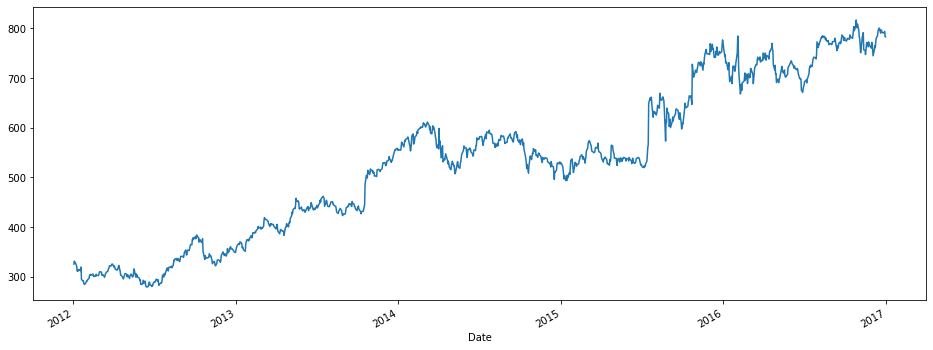

In [7]:
# Now plotting graph for growth of opening price from 2012 to 2017.
dataset['Open'].plot(figsize=(16,6))
plt.savefig("Outputs/growth of opening price from 2012-17.png")

**As we have noticed earlier from the data that three of the columns have data types** _float_ **while two have** _object_ **. Hence to homogenize it we are going to convert the column types of the dataframe.**

In [8]:
# converting str to str and replacing commas with None:
dataset["Close"] = dataset["Close"].astype(str).str.replace(',', '')

# Converting str to float
dataset["Close"] = dataset["Close"].astype(float)


In [9]:
# converting str to str and replacing commas with None:
dataset["Volume"] = dataset["Volume"].astype(str).str.replace(',', '')

# Converting str to float
dataset["Volume"] = dataset["Volume"].astype(float)


In [10]:
# Now again checking the data types of given columns.
dataset.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


### Taking a look at rolling averages (or often called as 'rolling mean')

In statistics, a [rolling average](https://en.wikipedia.org/wiki/Moving_average) (moving average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM) or rolling mean and is a type of finite impulse response filter.

**Hmm..! That means a Simple Rolling Average is the unweighted mean of the last n values.**

In [11]:
# Now we are interested in calculating 7 day rolling mean of our stock price.
# head() function here is going to give us first 20 rows.
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


**Important:**\
As we can see in above table, there is no output for first 6 days.\
Confused..? Let me explain!\
We have passed value 7 to the rolling function in pandas library.\
Now, what it does is that it takes the average of last 7 days and prints it on the latest date. Thus average of 3rd, 4th, 5th, 6th, 9th, 10th and 11th day of January is printed on 2012-01-11. But to print the 7 day rolling mean of 2012-01-10, we need to have one more row of data before 3rd of January.

### Okay! Let's compare our earlier graph of growth of 'Open' price with the rolling average curve for the same:
* earlier graph represented by blue color
* and rolling graph represented by orange color

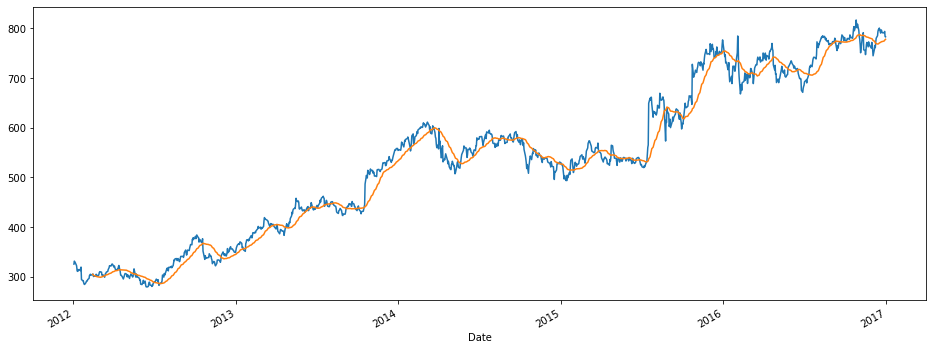

In [12]:
# Ploting 30 day rolling mean of 'Open' price along with
# the earlier graph of growth of 'Open' price.
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Open'].plot()
plt.savefig("Outputs/Open price vs 30 day rolling.png")

### Now compare 'Close' price with its rolling mean:

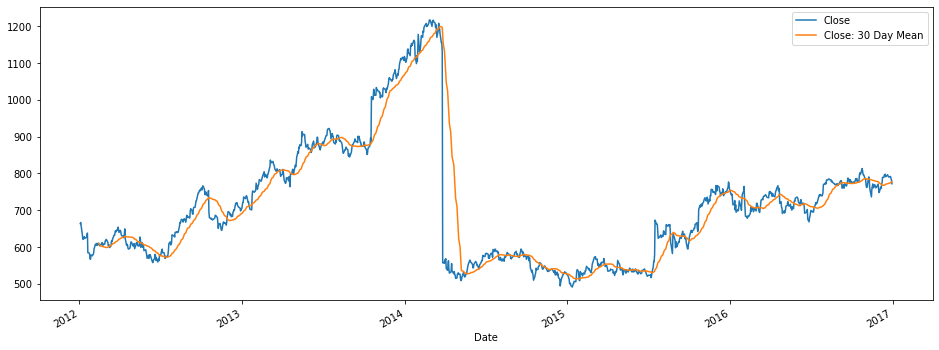

In [13]:
# Plotting graph of 'Close' price with its 30 day rolling mean.
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.savefig("Outputs/Close price vs 30 day rolling.png")


**We also have an option to specify a minimum number of period. So if we keep a minimum period of 1 then it means that minimum number of observation per window (which is of 30 days) should be one.**

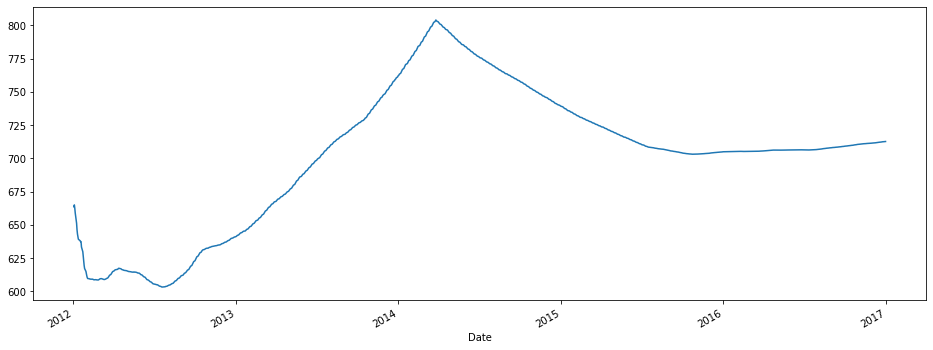

In [14]:
# Optionally we can specify a minimum number of periods.
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))
plt.savefig("Outputs/Understanding minimum period.png")


### Now finally here we are creating our first dataframe.

In [15]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


# Stage 2: Data Preprocessing

### The preprocessing stage involves:
* Data discretization (where we'll reduce a part of our data but with particular importance for the numerical data)
* Data transformation (which is nothing but data normalization)
* Data cleaning (fill in the missing values making a proper dataframe)
* Data integration (integrate data files)

After the data is transformed into a clean dataset, the dataset is divided into training and testing sets to evaluate.

In [16]:
# Data Cleaning
# Checking if there is any non-applicable possibility
dataset.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 Day Mean     True
dtype: bool

### Now in the next cell we are going to import MinMaxScaler() function from the Sklearn library. The installation process of this library has already been mentioned in the 'Installation Requirements.md' file available in this project folder.

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In timestepwhat actually we are doing is that we are taking data of 60 days and predicting the price at 61st day. Similarly, taking data from 2nd day to 61st day and making prediction for 62nd day, and so on.

# Stage 3: Feature Extraction

In this layer, only the features which are to be fed to the neural network are chosen.

### About imported libraries from Keras (which is basically Tensorflows high level API using for building and training deep learning models:
* Sequential - which is basically a linear stack of layers through which we can create a sequential model by passing a list through it.
* Dense - it is a regular deeply connected neural network layer. It is the most commonly and frequently used layer and is used to change the dimensions of our output vector. The Dense layer basically represents a matrix vector multiplication so the values and the matrices which are trainable parameters get updated during backpropagation. So if we get an m dimension layer as an output, a dense layer is used to change the dimensions of our vector.

In [19]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.


# Stage 4: Training Neural Network

In this stage, the data is fed to the neural network and trained for prediction assigning random biases and weights.

In [20]:
# Initialising the RNN
regressor = Sequential()



In [21]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



### 4.1: Optimizer
Next we are going to compile our RNN. Here we'll be using something called as an optimizer.\
An optimizer is one of the two arguments required to process sequential data using _Sequential()_ function in Keras library.

**Type of Optimizer**
The type of of optimizer used can greatly affect how fast the algorothim converges to the minimum value. Here we have chosen to use **Adam** optimizer. The Adam optimizer combines the perks of two other optimizers:\
**ADAgrad** and **RMSprop**

Now the ADAgrad optimizer essentially uses a different learning rate for every parameter and every step. The reasoning behind it is that parameters that are infrequent must have larger learning rates while parameters that are frequent must have smaller learning rates.\

_In other words, the learning rate is calculated based on the past gradients that have been computed for each parameter._

Talking about RMSprop, it considers fixing the diminishing learning rate by only using a certain number of previous gradients.

As we now have understood both ADAgrad & RMSprop, Let us move on to the Adam(Adaptive Movement Estimation):\
It is another method that computes the adaptive learning rates for each parameter by considering exponentially decaying average of the past gradients.

### 4.2: Regularization
It is an important aspect of training a model to make sure that the weights do not get too large and start focusing on one data point, hence overfitting. Thus we should always use a penalty for larger weights, where of course the definition of large would depend on the type of regularizer used and we have chosen to use **Tikhonov Regularization.**

### 4.3: Dropouts
A new method of preventing overfitting considers what happens when some of the neurons are suddenly not working. This forces the model not to be over-dependent on any groups of neurons and consider all of them. Dropouts have found there use in making the neurons more robust and hence allowing them to predict the trend without focusing on any one neuron.

In [22]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Stage 5: Output Generation

In this stage, the output value generated by the output layer of the RNN is compared with the target value.\
The error or the difference between the target and the obtained output value is minimized by using back propagation algorith.

In [24]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0015
Epoch 2/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0014
Epoch 3/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0014
Epoch 4/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0014
Epoch 5/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0014
Epoch 6/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0015
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0014
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0015
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0013
Epoch 10/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0015
Epoch 11/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0016
Epoch 12/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0015
Epoch 13/100


# Stage 6: Visualization

A rolling analysis of a time series model is often used to access the model's stability over time. When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time.

In [25]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)



In [27]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [29]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [30]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [31]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [32]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [33]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [34]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


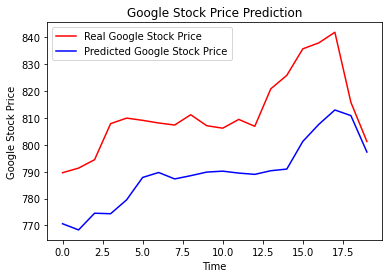

<Figure size 432x288 with 0 Axes>

In [35]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
plt.savefig("Outputs/Final Visualization.png")